## Load packages and read in the dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline  

In [2]:
#Reading in the dataset
df_kingcounty = pd.read_csv("kingcounty.csv")

## Requirements (What I think, the seller wants)
* The seller wants to...
    * maximize her sales profit
    * sell historical houses from before 1945 only 
    * know the best time to sell
    * know which features maximize sales profit of historical houses

## Assumptions on the data
* Time of selling influences the price, taking historical and taking non-historical as price
* There are some features that make some historical houses more expensive than others (e.g no. of rooms, age of house, renovated?, waterview?) Just take some features. Check the correlations
* If T renevates the house, she gets a higher price. compare colums. 

## Exploring the dataset

In [3]:
#Show number of rows and colums
df_kingcounty.shape

(21597, 21)

In [4]:
#Show top 5-rows and all colums
df_kingcounty.head() # First 5 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
#Show column names
df_kingcounty.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
#Rename colums to more understandable names 
df_kingcounty.rename(columns={'date': 'sales_date', 
                            'view': 'viewed', 
                            'condition': 'overall_condition', 
                            'grade': 'overall_grade'}, inplace=True)

#Show column names
df_kingcounty.columns

Index(['id', 'sales_date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'viewed', 'overall_condition',
       'overall_grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [7]:
#Show top 5-rows and all colums
df_kingcounty.head() # First 5 rows

,id,sales_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewed,...,overall_grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
#Look at the data type for each column and the number of null values
df_kingcounty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21597 non-null  int64  
 1   sales_date         21597 non-null  object 
 2   price              21597 non-null  float64
 3   bedrooms           21597 non-null  int64  
 4   bathrooms          21597 non-null  float64
 5   sqft_living        21597 non-null  int64  
 6   sqft_lot           21597 non-null  int64  
 7   floors             21597 non-null  float64
 8   waterfront         19221 non-null  float64
 9   viewed             21534 non-null  float64
 10  overall_condition  21597 non-null  int64  
 11  overall_grade      21597 non-null  int64  
 12  sqft_above         21597 non-null  int64  
 13  sqft_basement      21597 non-null  object 
 14  yr_built           21597 non-null  int64  
 15  yr_renovated       17755 non-null  float64
 16  zipcode            215

In [9]:
#Summarize the data
df_kingcounty.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewed,overall_condition,overall_grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
#Convert to month and years
pd.to_datetime(df_kingcounty["sales_date"])
df_kingcounty["sales_year"] = pd.DatetimeIndex(df_kingcounty["sales_date"]).year
df_kingcounty["sales_month"] = pd.DatetimeIndex(df_kingcounty["sales_date"]).month

df_kingcounty.head()

,id,sales_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewed,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2


In [11]:
#Remove outliers and funny values
#Find NAN values 
df_kingcounty.isnull().sum().sort_values()

id                      0
sqft_lot15              0
sqft_living15           0
long                    0
lat                     0
zipcode                 0
yr_built                0
sqft_basement           0
sqft_above              0
sales_year              0
overall_grade           0
floors                  0
sqft_lot                0
sqft_living             0
bathrooms               0
bedrooms                0
price                   0
sales_date              0
overall_condition       0
sales_month             0
viewed                 63
waterfront           2376
yr_renovated         3842
dtype: int64

/Users/jenny/opt/anaconda3/envs/kingcounty/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


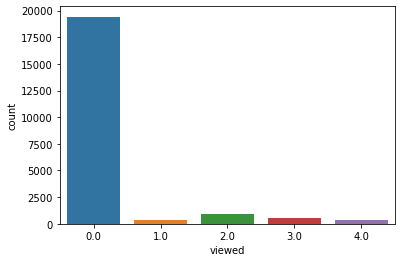

In [12]:
sns.countplot(df_kingcounty['viewed']);

In [13]:
df_kingcounty.viewed.dropna(axis=0, inplace=True)

In [14]:
df_kingcounty.isnull().sum().sort_values()

id                      0
sqft_lot15              0
sqft_living15           0
long                    0
lat                     0
zipcode                 0
yr_built                0
sqft_basement           0
sqft_above              0
sales_year              0
overall_grade           0
floors                  0
sqft_lot                0
sqft_living             0
bathrooms               0
bedrooms                0
price                   0
sales_date              0
overall_condition       0
sales_month             0
viewed                 63
waterfront           2376
yr_renovated         3842
dtype: int64

## Exploring the dataset with regard to the assumptions

Variables needed to investigate seller's questions
* The seller wants to...
    * maximize her sales profit
    * sell historical houses from before 1945 only 
    * know the best time to sell
    * know which features maximize sales profit of historical houses
    
'sales_date', 
'price'
'bedrooms', 
'bathrooms', 
'sqft_living',
'sqft_lot', 
'waterfront', 
'overall_condition',
'overall_grade', 
'yr_built',
'yr_renovated', 
'lat', 
'long', 
'sqft_living15',
'sqft_lot15'

In [15]:
#Create a dataset that contains only historical houses built before 1945
df_kingcounty_hist = df_kingcounty[df_kingcounty['yr_built'] < 1945]
df_kingcounty_hist.head()

,id,sales_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewed,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,2
11,9212900260,5/27/2014,468000.0,2,1.0,1160,6000,1.0,0.0,0.0,...,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000,2014,5
12,114101516,5/28/2014,310000.0,3,1.0,1430,19901,1.5,0.0,0.0,...,0.0,1927,NaN,98028,47.7558,-122.229,1780,12697,2014,5
14,1175000570,3/12/2015,530000.0,5,2.0,1810,4850,1.5,0.0,0.0,...,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850,2015,3
17,6865200140,5/29/2014,485000.0,4,1.0,1600,4300,1.5,0.0,0.0,...,0.0,1916,0.0,98103,47.6648,-122.343,1610,4300,2014,5


In [16]:
#Create a dataset that contains only non-historical houses built before 1945
df_kingcounty_modern = df_kingcounty[df_kingcounty['yr_built'] >= 1945]
df_kingcounty_modern.head()

,id,sales_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewed,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,2014,5


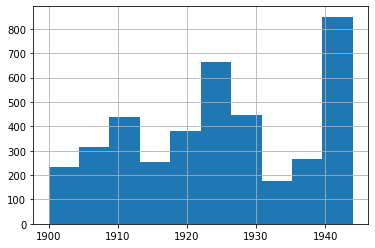

In [17]:
#Make histograms to investigate the distribution of the variables
df_kingcounty_hist['yr_built'].hist();

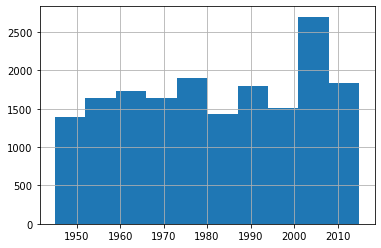

In [18]:
df_kingcounty_modern['yr_built'].hist();

/Users/jenny/opt/anaconda3/envs/kingcounty/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


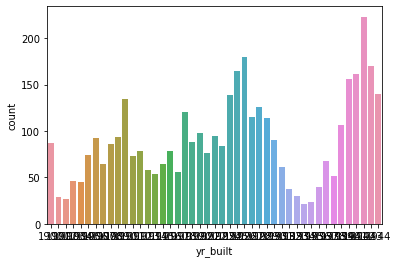

In [19]:
#Count the historical houses 
sns.countplot(df_kingcounty_hist['yr_built']); 

In [20]:
#Transform the sales date


In [21]:
#Taking the logarithm to normalize the distribution
df_kingcounty_hist['price_log'] = np.log(df_kingcounty_hist['price'])
df_kingcounty_modern['price_log'] = np.log(df_kingcounty_modern['price'])

<ipython-input-21-25feb1398562>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kingcounty_hist['price_log'] = np.log(df_kingcounty_hist['price'])
<ipython-input-21-25feb1398562>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kingcounty_modern['price_log'] = np.log(df_kingcounty_modern['price'])


In [22]:
df_kingcounty_hist.head()

,id,sales_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewed,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month,price_log
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0.0,0.0,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,2,12.100712
11,9212900260,5/27/2014,468000.0,2,1.0,1160,6000,1.0,0.0,0.0,...,1942,0.0,98115,47.6900,-122.292,1330,6000,2014,5,13.056224
12,114101516,5/28/2014,310000.0,3,1.0,1430,19901,1.5,0.0,0.0,...,1927,NaN,98028,47.7558,-122.229,1780,12697,2014,5,12.644328
14,1175000570,3/12/2015,530000.0,5,2.0,1810,4850,1.5,0.0,0.0,...,1900,0.0,98107,47.6700,-122.394,1360,4850,2015,3,13.180632
17,6865200140,5/29/2014,485000.0,4,1.0,1600,4300,1.5,0.0,0.0,...,1916,0.0,98103,47.6648,-122.343,1610,4300,2014,5,13.091904


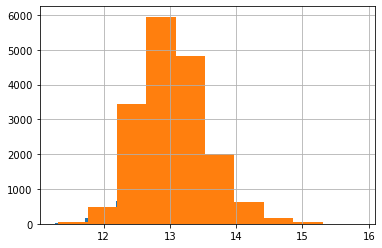

In [23]:
df_kingcounty_hist['price_log'].hist();
df_kingcounty_modern['price_log'].hist();

Text(0, 0.5, 'price')

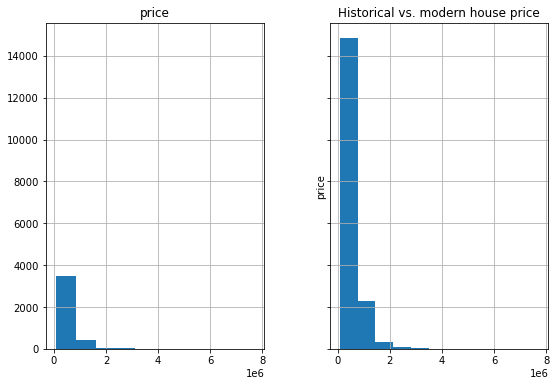

In [24]:
fig, axes = plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(9,6))

df_kingcounty_hist.hist(column=['price'],ax=axes[0])
df_kingcounty_modern.hist(column=['price'],ax=axes[1])

plt.title('Historical vs. modern house price')
plt.xlabel('')
plt.ylabel('price')

In [25]:
#Map with longditude 


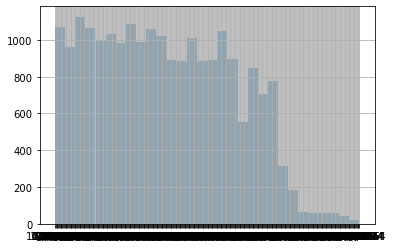

In [26]:
df_kingcounty['sales_date'].hist(bins=30);

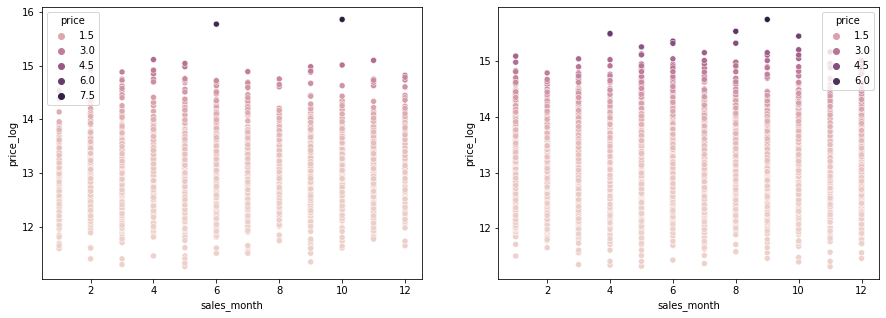

In [27]:
#Scatter price of historical houses per year
#sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")
f, axes = plt.subplots(1,2, figsize=(15,5), squeeze=False)
sns.scatterplot(data=df_kingcounty_hist, x="sales_month", y="price_log", hue="price", ax=axes[0][0])
sns.scatterplot(data=df_kingcounty_modern, x="sales_month", y="price_log", hue="price", ax=axes[0][1]);



#g = sns.FacetGrid(tips, col="sex", hue="smoker")
#g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
#g.add_legend()

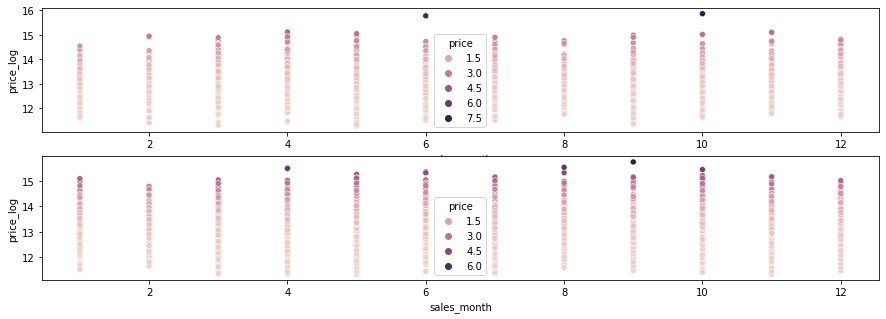

In [28]:
#Scatter price of historical houses per year
#sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")
f, axes = plt.subplots(2, figsize=(15,5))
sns.scatterplot(data=df_kingcounty_hist, x="sales_month", y="price_log", hue="price", ax=axes[0])
sns.scatterplot(data=df_kingcounty_modern, x="sales_month", y="price_log", hue="price", ax=axes[1]);



In [29]:
df_kingcounty_hist.groupby('sales_month')
df_kingcounty_hist.groupby('sales_month')['price'].median()

sales_month
1     453500.0
2     455000.0
3     505000.0
4     518000.0
5     498500.0
6     500000.0
7     518000.0
8     452000.0
9     477500.0
10    485000.0
11    470500.0
12    482000.0
Name: price, dtype: float64

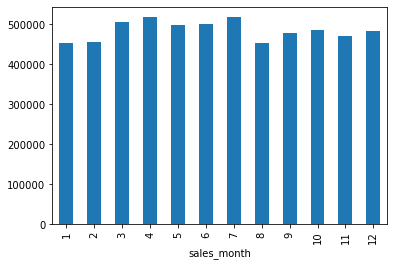

In [30]:
price_median = df_kingcounty_hist.groupby('sales_month')['price'].median()
#sns.barplot(data=df_kingcounty_hist, y=price_median, x=sales_month)
price_median.plot.bar(); 


In [31]:


#fig, axes = plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(9,6))

#df_kingcounty_hist.boxplot(column=['logpop'],ax=axes[0],patch_artist=True)
#df2.boxplot(column=['logpop'],ax=axes[1],patch_artist=True)



In [32]:
#
#df_kingcounty.nunique

/Users/jenny/opt/anaconda3/envs/kingcounty/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

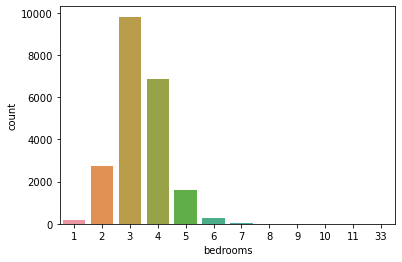

In [33]:
sns.countplot(df_kingcounty['bedrooms'])

In [34]:
df_kingcounty[df_kingcounty['bedrooms']>10]


,id,sales_date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,viewed,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960,2014,8
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,2014,6


In [35]:
#Change of data type
#df_kingcounty.floors = df_kingcounty.floors.astype("int")
#df_kingcounty.waterfront = df_kingcounty.waterfront.astype("int")
#df_kingcounty.yr_built = df_kingcounty.yr_built.astype("int")
#df_kingcounty.zipcode = df_kingcounty.zipcode.astype("int")
#df_kingcounty.get_dummies(waterfront, drop_first=True)

In [36]:
#Group by sth. 
#df_kingcounty.groupby('sex').mean()

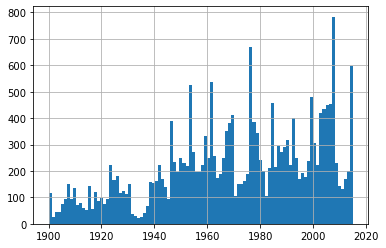

In [37]:
df_kingcounty['yr_built'].hist(bins=100); 

In [38]:
#Show column names
df_kingcounty.columns

Index(['id', 'sales_date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'viewed', 'overall_condition',
       'overall_grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'sales_year', 'sales_month'],
      dtype='object')

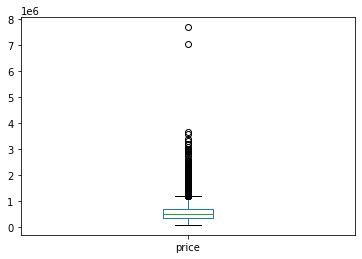

In [39]:
#Plot a boxplot to look for outliers
df_kingcounty_hist['price'].plot(kind='box');
#There are strong outliers. 

In [66]:
#Delete outliers
df_kingcounty_hist_nooutliers = df_kingcounty_hist[df_kingcounty_hist['price']<4.000000e+06]



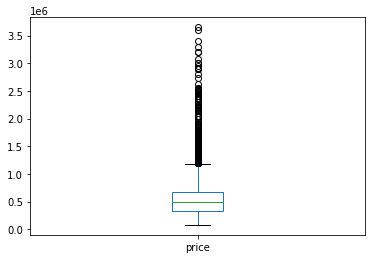

In [67]:
df_kingcounty_hist_nooutliers['price'].plot(kind='box');

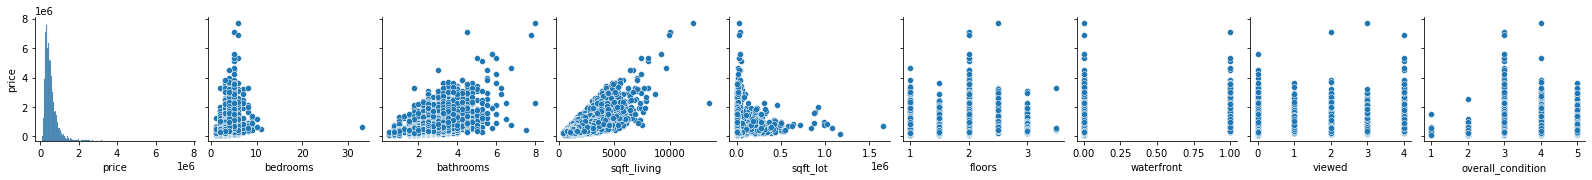

In [41]:
#Set up some pairplots to check on correlations with price
sns.pairplot(df_kingcounty,
    x_vars=['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'viewed', 'overall_condition'],
    y_vars=['price'],
);

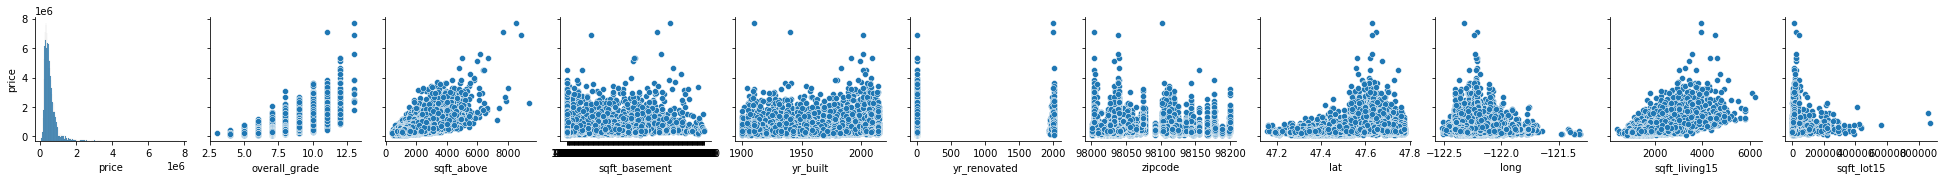

In [42]:
sns.pairplot(df_kingcounty,
    x_vars=['price', 'overall_grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15','sqft_lot15'],
    y_vars=['price'],
);

# Conclusions drawn from pairplots
According to the pairplots the house price may be affected by:
- 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'overall_condition'
- 'overall_grade', 'sqft_above','yr_renovated', 'zipcode', 'sqft_living15','sqft_lot15'

# Possible questions of Stakeholder Tereza (agent/broker)
* What factors influences the house price? (Exploratory Factor Analysis)

# Assumptions on buyers, sellers & agents
* Buyers want to pay the lowest possible prize. 
* Sellers want to maximize the sales price of their house. 
* Agents want to maximize their agent services profits. 

In [43]:
#Plot a boxplot to look at the distribution of promising predictor variables
#df_kingcounty['citric acid'].plot(kind='box');

In [44]:
#formulated some assumptions about buyers and sellers
#plotted boxplots /histograms and other overview plots
#have identified extreme values and discarded them

# Use of multiple linear regression to explore the data 

In [45]:
smf.ols(formula='price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + overall_condition + overall_grade + sqft_above + sqft_basement+ yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     140.3
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:22:10   Log-Likelihood:            -2.1492e+05
No. Observations:               15809   AIC:                         4.304e+05
Df Residuals:                   15508   BIC:                         4.327e+05
Df Model:                         300                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -4.287e+06   3.38e+06     -1.270      0.204   -1.09e+07    2.33e+06
sqft_basement[T.10.0]    1.085e+04   1.96e+05      0.055      0.956   -3.73e+05    3.95e+05
sqft_basement[T.100.0]   5.302e+04   3.43e+04      1.545      0.122   -1.43e+04     1.2e+05
sqft_basement[T.1000.0] -8002.1065   3.12e+04     -0.257      0.797   -6.91e+04    5.31e+04
sqft_basement[T.1008.0] -5.868e+04   1.98e+05     -0.297      0.766   -4.46e+05    3.28e+05
sqft_basement[T.1010.0]  3.178e+04   3.76e+04      0.845      0.398   -4.19e+04    1.06e+05
sqft_basement[T.1020.0]  9.252e+04   4.09e+04      2.259      0.024    1.23e+04    1.73e+05
sqft_basement[T.1024.0] -5.456e+05   1.98e+05     -2.761      0.006   -9.33e+05   -1.58e+05
sqft_basement[T.1030.0]  1.118e+05   4.31e+04      2.591      0.010    2.72e+04    1.96e+05
sqft_basement[T.1040.0] -3.099e+04   3.99e+04     -0.776      0.438   -1.09e+05    4.73e+04
sqft_basement[T.1050.0]  7.287e+04   4.21e+04      1.729      0.084   -9720.336    1.55e+05
sqft_basement[T.1060.0] -6.517e+04   3.89e+04     -1.676      0.094   -1.41e+05     1.1e+04
sqft_basement[T.1070.0] -2.915e+04   4.47e+04     -0.653      0.514   -1.17e+05    5.84e+04
sqft_basement[T.1080.0] -2.446e+04   4.78e+04     -0.512      0.609   -1.18e+05    6.92e+04
sqft_basement[T.1090.0]  5021.6700   4.86e+04      0.103      0.918   -9.03e+04       1e+05
sqft_basement[T.110.0]   1.052e+04   5.45e+04      0.193      0.847   -9.63e+04    1.17e+05
sqft_basement[T.1100.0]  1.186e+04   3.77e+04      0.315      0.753    -6.2e+04    8.57e+04
sqft_basement[T.1110.0]  2.975e+04   4.69e+04      0.634      0.526   -6.22e+04    1.22e+05
sqft_basement[T.1120.0]  2.562e+04   4.28e+04      0.599      0.549   -5.83e+04    1.09e+05
sqft_basement[T.1130.0] -2.518e+04   5.08e+04     -0.496      0.620   -1.25e+05    7.43e+04
sqft_basement[T.1135.0] -2.679e+05   1.98e+05     -1.354      0.176   -6.56e+05     1.2e+05
sqft_basement[T.1140.0]  4.458e+04   5.27e+04      0.845      0.398   -5.88e+04    1.48e+05
sqft_basement[T.1150.0] -4188.5216   5.19e+04     -0.081      0.936   -1.06e+05    9.76e+04
sqft_basement[T.1160.0] -9.704e+04    5.4e+04     -1.796      0.073   -2.03e+05    8876.717
sqft_basement[T.1170.0] -8.281e+04   5.31e+04     -1.558      0.119   -1.87e+05    2.14e+04
sqft_basement[T.1180.0]  -884.0569   5.06e+04     -0.017      0.986      -1e+05    9.84e+04
sqft_basement[T.1190.0] -5334.6064   5.56e+04     -0.096      0.924   -1.14e+05    1.04e+05
sqft_basement[T.120.0]   5.868e+04   3.29e+04      1.783      0.075   -5831.783    1.23e+05
sqft_basement[T.1200.0] -7970.8842   3.93e+04     -0.203      0.839   -8.49e+04     6.9e+04
sqft_basement[T.1210.0]  -1.13e+05   5.71e+04     -1.981      0.048   -2.25e+05   -1207.442
sqft_basement[T.1220.0]    7.5e+04   4.91e+04  

In [46]:
smf.ols(formula='price ~ bedrooms',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:22:11   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.272e+05   8979.293     14.166      0.000     1.1e+05    1.45e+05
bedrooms    1.225e+05   2566.930     47.709      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18831.341   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195104.832
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      38.598   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
smf.ols(formula='price ~ bathrooms',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:22:11   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8712.6518   6224.769      1.400      0.162   -3488.356    2.09e+04
bathrooms   2.512e+05   2765.054     90.863      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17251.570   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882735.889
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.550   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
smf.ols(formula='price ~ sqft_living',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:22:11   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
smf.ols(formula='price ~ sqft_lot',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     175.9
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           5.57e-40
Time:                        17:22:11   Log-Likelihood:            -3.0730e+05
No. Observations:               21597   AIC:                         6.146e+05
Df Residuals:                   21595   BIC:                         6.146e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.283e+05   2650.075    199.337      0.000    5.23e+05    5.33e+05
sqft_lot       0.7973      0.060     13.261      0.000       0.679       0.915
==============================================================================
Omnibus:                    19136.153   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1147708.008
Skew:                           4.030   Prob(JB):                         0.00
Kurtosis:                      37.792   Cond. No.                     4.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
smf.ols(formula='price ~ floors',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1525.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          2.57e-322
Time:                        17:22:11   Log-Likelihood:            -3.0665e+05
No. Observations:               21597   AIC:                         6.133e+05
Df Residuals:                   21595   BIC:                         6.133e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.791e+05   7111.797     39.247      0.000    2.65e+05    2.93e+05
floors      1.748e+05   4476.843     39.047      0.000    1.66e+05    1.84e+05
==============================================================================
Omnibus:                    19356.966   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1255747.571
Skew:                           4.076   Prob(JB):                         0.00
Kurtosis:                      39.456   Cond. No.                         6.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
smf.ols(formula='price ~ waterfront',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1588.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:22:11   Log-Likelihood:            -2.7306e+05
No. Observations:               19221   AIC:                         5.461e+05
Df Residuals:                   19219   BIC:                         5.461e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.326e+05   2590.404    205.621      0.000    5.28e+05    5.38e+05
waterfront  1.185e+06   2.97e+04     39.855      0.000    1.13e+06    1.24e+06
==============================================================================
Omnibus:                    16093.329   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           894387.382
Skew:                           3.694   Prob(JB):                         0.00
Kurtosis:                      35.591   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
smf.ols(formula='price ~ overall_condition',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.11
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.16e-07
Time:                        17:22:11   Log-Likelihood:            -3.0738e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.709e+05   1.33e+04     35.322      0.000    4.45e+05    4.97e+05
overall_condition  2.036e+04   3840.295      5.302      0.000    1.28e+04    2.79e+04
==============================================================================
Omnibus:                    19113.390   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1136802.126
Skew:                           4.025   Prob(JB):                         0.00
Kurtosis:                      37.619   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
smf.ols(formula='price ~ overall_grade',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:22:11   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
overall_grade  2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
smf.ols(formula='price ~ sqft_above',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:22:11   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.976e+04   4737.581     12.613      0.000    5.05e+04     6.9e+04
sqft_above   268.6684      2.404    111.767      0.000     263.957     273.380
==============================================================================
Omnibus:                    16492.245   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728366.432
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.691   Cond. No.                     4.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
smf.ols(formula='price ~ sqft_basement',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     17.78
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:22:12   Log-Likelihood:            -3.0496e+05
No. Observations:               21597   AIC:                         6.105e+05
Df Residuals:                   21293   BIC:                         6.129e+05
Df Model:                         303                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 4.87e+05   2918.475    166.865      0.000    4.81e+05    4.93e+05
sqft_basement[T.10.0]   -2.951e+05   2.34e+05     -1.263      0.207   -7.53e+05    1.63e+05
sqft_basement[T.100.0]   3.903e+04   5.11e+04      0.764      0.445   -6.11e+04    1.39e+05
sqft_basement[T.1000.0]  2.275e+05   2.73e+04      8.327      0.000    1.74e+05    2.81e+05
sqft_basement[T.1008.0]  -1.98e+05   3.31e+05     -0.599      0.549   -8.46e+05     4.5e+05
sqft_basement[T.1010.0]  1.912e+05   4.17e+04      4.579      0.000    1.09e+05    2.73e+05
sqft_basement[T.1020.0]  2.521e+05   4.64e+04      5.436      0.000    1.61e+05    3.43e+05
sqft_basement[T.1024.0]  5.001e+04   3.31e+05      0.151      0.880   -5.98e+05    6.98e+05
sqft_basement[T.1030.0]  2.817e+05   4.99e+04      5.645      0.000    1.84e+05     3.8e+05
sqft_basement[T.1040.0]  1.919e+05   4.47e+04      4.296      0.000    1.04e+05    2.79e+05
sqft_basement[T.1050.0]  2.676e+05   5.17e+04      5.176      0.000    1.66e+05    3.69e+05
sqft_basement[T.1060.0]    1.5e+05   4.35e+04      3.448      0.001    6.47e+04    2.35e+05
sqft_basement[T.1070.0]  2.373e+05   4.64e+04      5.117      0.000    1.46e+05    3.28e+05
sqft_basement[T.1080.0]  1.129e+05   5.85e+04      1.930      0.054   -1760.947    2.28e+05
sqft_basement[T.1090.0]  2.458e+05   5.85e+04      4.202      0.000    1.31e+05     3.6e+05
sqft_basement[T.110.0]  -8.157e+04    7.8e+04     -1.046      0.295   -2.34e+05    7.12e+04
sqft_basement[T.1100.0]  2.432e+05   3.75e+04      6.478      0.000     1.7e+05    3.17e+05
sqft_basement[T.1110.0]   3.84e+05   5.59e+04      6.865      0.000    2.74e+05    4.94e+05
sqft_basement[T.1120.0]  3.207e+05   5.05e+04      6.351      0.000    2.22e+05     4.2e+05
sqft_basement[T.1130.0]  2.463e+05   6.04e+04      4.076      0.000    1.28e+05    3.65e+05
sqft_basement[T.1135.0] -9.454e+04   3.31e+05     -0.286      0.775   -7.42e+05    5.53e+05
sqft_basement[T.1140.0]  3.285e+05   6.25e+04      5.254      0.000    2.06e+05    4.51e+05
sqft_basement[T.1150.0]  2.082e+05   6.37e+04      3.270      0.001    8.34e+04    3.33e+05
sqft_basement[T.1160.0]  1.665e+05   6.49e+04      2.566      0.010    3.93e+04    2.94e+05
sqft_basement[T.1170.0]  2.333e+05   6.04e+04      3.862      0.000    1.15e+05    3.52e+05
sqft_basement[T.1180.0]  2.771e+05   6.25e+04      4.432      0.000    1.55e+05       4e+05
sqft_basement[T.1190.0]  2.714e+05   6.75e+04      4.018      0.000    1.39e+05    4.04e+05
sqft_basement[T.120.0]   1.668e+04   4.55e+04      0.367      0.714   -7.25e+04    1.06e+05
sqft_basement[T.1200.0]  2.362e+05   3.99e+04      5.919      0.000    1.58e+05    3.14e+05
sqft_basement[T.1210.0]  1.611e+05    7.8e+04      2.066      0.039    8283.479    3.14e+05
sqft_basement[T.1220.0]  3.056e+05   5.94e+04  

In [56]:
smf.ols(formula='price ~ yr_built',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     63.05
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           2.12e-15
Time:                        17:22:12   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.896e+05   1.68e+05     -4.714      0.000   -1.12e+06   -4.61e+05
yr_built     674.7431     84.979      7.940      0.000     508.178     841.308
==============================================================================
Omnibus:                    19135.901   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1142512.023
Skew:                           4.031   Prob(JB):                         0.00
Kurtosis:                      37.708   Cond. No.                     1.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
smf.ols(formula='price ~ yr_renovated',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     303.3
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           2.32e-67
Time:                        17:22:12   Log-Likelihood:            -2.5265e+05
No. Observations:               17755   AIC:                         5.053e+05
Df Residuals:                   17753   BIC:                         5.053e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.307e+05   2807.686    188.999      0.000    5.25e+05    5.36e+05
yr_renovated   119.6688      6.872     17.415      0.000     106.200     133.138
==============================================================================
Omnibus:                    15960.413   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1018935.768
Skew:                           4.100   Prob(JB):                         0.00
Kurtosis:                      39.195   Cond. No.                         417.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
smf.ols(formula='price ~ zipcode',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     61.76
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           4.06e-15
Time:                        17:22:12   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.65e+07   4.58e+06      7.977      0.000    2.75e+07    4.55e+07
zipcode     -366.6086     46.649     -7.859      0.000    -458.045    -275.173
==============================================================================
Omnibus:                    19044.296   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1123391.740
Skew:                           4.004   Prob(JB):                         0.00
Kurtosis:                      37.413   Cond. No.                     1.80e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
smf.ols(formula='price ~ lat',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2242.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:22:12   Log-Likelihood:            -3.0632e+05
No. Observations:               21597   AIC:                         6.127e+05
Df Residuals:                   21595   BIC:                         6.127e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.814e+07   8.17e+05    -46.689      0.000   -3.97e+07   -3.65e+07
lat         8.132e+05   1.72e+04     47.351      0.000     7.8e+05    8.47e+05
==============================================================================
Omnibus:                    20309.325   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1511477.644
Skew:                           4.367   Prob(JB):                         0.00
Kurtosis:                      43.042   Cond. No.                     1.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
smf.ols(formula='price ~ long',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.49
Date:                Wed, 14 Oct 2020   Prob (F-statistic):            0.00120
Time:                        17:22:12   Log-Likelihood:            -3.0739e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.571e+06   2.17e+06      3.488      0.000    3.32e+06    1.18e+07
long        5.753e+04   1.78e+04      3.239      0.001    2.27e+04    9.23e+04
==============================================================================
Omnibus:                    19133.231   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1137712.625
Skew:                           4.032   Prob(JB):                         0.00
Kurtosis:                      37.630   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
smf.ols(formula='price ~ sqft_living15',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.125e+04
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:22:12   Log-Likelihood:            -3.0286e+05
No. Observations:               21597   AIC:                         6.057e+05
Df Residuals:                   21595   BIC:                         6.057e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.303e+04   6216.659    -13.356      0.000   -9.52e+04   -7.08e+04
sqft_living15   313.7615      2.958    106.064      0.000     307.963     319.560
==============================================================================
Omnibus:                    20143.282   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1910578.895
Skew:                           4.207   Prob(JB):                         0.00
Kurtosis:                      48.303   Cond. No.                     6.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
smf.ols(formula='price ~ sqft_lot15',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     149.2
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           3.30e-34
Time:                        17:22:12   Log-Likelihood:            -3.0732e+05
No. Observations:               21597   AIC:                         6.146e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.261e+05   2750.361    191.269      0.000    5.21e+05    5.31e+05
sqft_lot15     1.1159      0.091     12.216      0.000       0.937       1.295
==============================================================================
Omnibus:                    19122.814   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1142329.322
Skew:                           4.027   Prob(JB):                         0.00
Kurtosis:                      37.707   Cond. No.                     3.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
smf.ols(formula='price ~ waterfront',
    data=df_kingcounty).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1588.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:22:13   Log-Likelihood:            -2.7306e+05
No. Observations:               19221   AIC:                         5.461e+05
Df Residuals:                   19219   BIC:                         5.461e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.326e+05   2590.404    205.621      0.000    5.28e+05    5.38e+05
waterfront  1.185e+06   2.97e+04     39.855      0.000    1.13e+06    1.24e+06
==============================================================================
Omnibus:                    16093.329   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           894387.382
Skew:                           3.694   Prob(JB):                         0.00
Kurtosis:                      35.591   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible.


In [64]:
# Distributions of train and test data should be normal 


a. Split the dataset into a train and a test set. (use the sklearn split method
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html​ )

b. Use Root Mean Squared Error (RMSE) as your metric of success and try to minimize this score on your test data.

In [65]:
df_kingcounty_modern['price'].boxplot();

AttributeError: 'Series' object has no attribute 'boxplot'